# City of New Orleans Electronic Police Report 2024

> Exploratory data analysis and machine learning prediction.

In [38]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for statistical testing
from scipy import stats
from scipy.stats import mannwhitneyu
from itertools import combinations

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# for temporal analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## GET THE DATA

In [2]:
# Read a csv file
df = pd.read_csv('../data/Electronic_Police_Report_2024.csv')

In [3]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Item_Number,0,0.000000,0,0.0,0,0.0
District,0,0.000000,0,0.0,0,0.0
Location,0,0.000000,0,0.0,0,0.0
Disposition,0,0.000000,0,0.0,0,0.0
Signal_Type,0,0.000000,0,0.0,0,0.0
Signal_Description,0,0.000000,0,0.0,0,0.0
Occurred_Date_Time,0,0.000000,0,0.0,0,0.0
Charge_Code,97998,54.613546,0,0.0,0,0.0
Charge_Description,97998,54.613546,0,0.0,0,0.0
Offender_Number,76792,42.795602,0,0.0,0,0.0


In [4]:
df.head()

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Offender_Number,OffenderID,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,G-07753-24,7,Morrison Rd & Newcastle St,OPEN,35,SIMPLE BATTERY,2024-07-08 17:00:00,14 35,SIMPLE BATTERY,1.0,903303.0,NaN,BLACK,FEMALE,NaN,1.0,VICTIM,BLACK,FEMALE,16.0,Non-fatal,NaN,Incident Report
1,G-07737-24,8,001XX Carondelet St,CLOSED,966,DRUG LAW VIOLATION,2024-07-08 16:40:00,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,1.0,903297.0,ARRESTED,BLACK,MALE,37.0,1.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Incident Report
2,G-07737-24,8,001XX Carondelet St,CLOSED,966,DRUG LAW VIOLATION,2024-07-08 16:40:00,40 967,PROHIBITED ACTS-- SCHEDULE II DRUGS,1.0,903297.0,ARRESTED,BLACK,MALE,37.0,1.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Incident Report
3,G-07737-24,8,001XX Carondelet St,CLOSED,966,DRUG LAW VIOLATION,2024-07-08 16:40:00,14 108,RESISTING AN OFFICER,1.0,903297.0,ARRESTED,BLACK,MALE,37.0,1.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Incident Report
4,G-07737-24,8,001XX Carondelet St,CLOSED,966,DRUG LAW VIOLATION,2024-07-08 16:40:00,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,2.0,903298.0,ARRESTED,BLACK,MALE,28.0,1.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Incident Report


In [5]:
df.columns

Index(['Item_Number', 'District', 'Location', 'Disposition', 'Signal_Type',
       'Signal_Description', 'Occurred_Date_Time', 'Charge_Code',
       'Charge_Description', 'Offender_Number', 'OffenderID', 'OffenderStatus',
       'Offender_Race', 'Offender_Gender', 'Offender_Age', 'Victim_Number',
       'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Age',
       'Victim_Fatal_Status', 'Hate Crime', 'Report Type'],
      dtype='object')

In [6]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param) 

show_values(df, ['District', 'Disposition', 'Signal_Type', 'Signal_Description', 'Charge_Code', 'Charge_Description',
                'OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Offender_Age', 'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Victim_Fatal_Status',
                'Hate Crime', 'Report Type'])

District
District
7    32702
8    30580
5    23375
6    22706
3    19694
1    18554
2    16713
4    15115
Name: count, dtype: int64


Disposition
Disposition
OPEN         141972
CLOSED        35789
UNFOUNDED      1678
Name: count, dtype: int64


Signal_Type
Signal_Type
103D      25173
21        16383
103       10341
67S       10011
67         9929
35D        9641
35         7535
67A        7416
56         7222
62C        7096
67F        4842
21P        4724
29         3156
966        2881
63         2592
37         2432
27-67A     2189
67P        2119
103F       2053
21J        1989
62B        1840
62         1806
95G        1755
62R        1690
17F        1670
21M        1373
103M       1219
21R        1201
37D        1155
67C        1098
34S        1015
79         1005
64G         997
66          995
94          914
29U         908
24          900
56D         887
67B         830
93          787
67AR        785
29SA        674
43          581
34C         572
65          568
68        

In [7]:
show_values(df, ['District', 'Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Offender_Age',
                 'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Victim_Fatal_Status',
                'Hate Crime', 'Report Type'])

District
District
7    32702
8    30580
5    23375
6    22706
3    19694
1    18554
2    16713
4    15115
Name: count, dtype: int64


Disposition
Disposition
OPEN         141972
CLOSED        35789
UNFOUNDED      1678
Name: count, dtype: int64


OffenderStatus
OffenderStatus
NaN         144564
ARRESTED     34875
Name: count, dtype: int64


Offender_Race
Offender_Race
NaN                                          76794
BLACK                                        57567
UNKNOWN                                      34981
WHITE                                         9857
ASIAN                                          178
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER       44
AMER. IND.                                      18
Name: count, dtype: int64


Offender_Gender
Offender_Gender
NaN        76794
MALE       51572
UNKNOWN    32014
FEMALE     19059
Name: count, dtype: int64


Offender_Age
Offender_Age
NaN     133409
32.0      1659
31.0      1637
35.0      1599
33.0      1554
34.0      1540
3

In [8]:
# Identify categorical columns (excluding numerical ones)
categorical_columns = ['District', 'Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender',
                       'PersonType', 'Victim_Race', 'Victim_Gender','Victim_Fatal_Status']


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='District'>

Text(0.5, 0, 'District')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of District')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '3'),
  Text(5, 0, '1'),
  Text(6, 0, '2'),
  Text(7, 0, '4')])

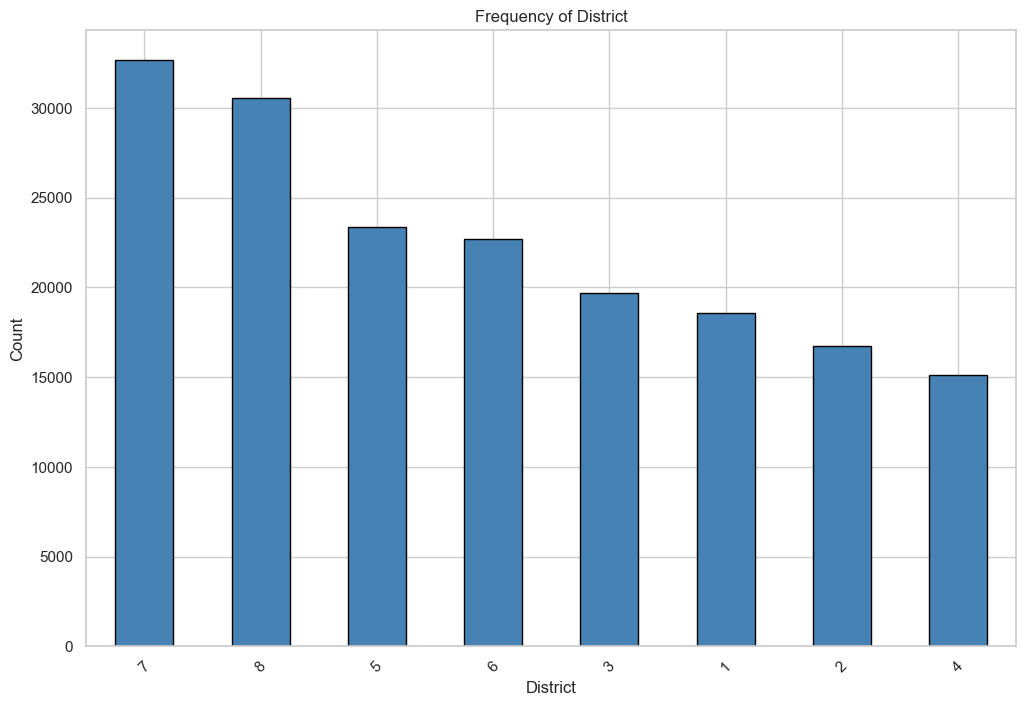

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Disposition'>

Text(0.5, 0, 'Disposition')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of Disposition')

(array([0, 1, 2]),
 [Text(0, 0, 'OPEN'), Text(1, 0, 'CLOSED'), Text(2, 0, 'UNFOUNDED')])

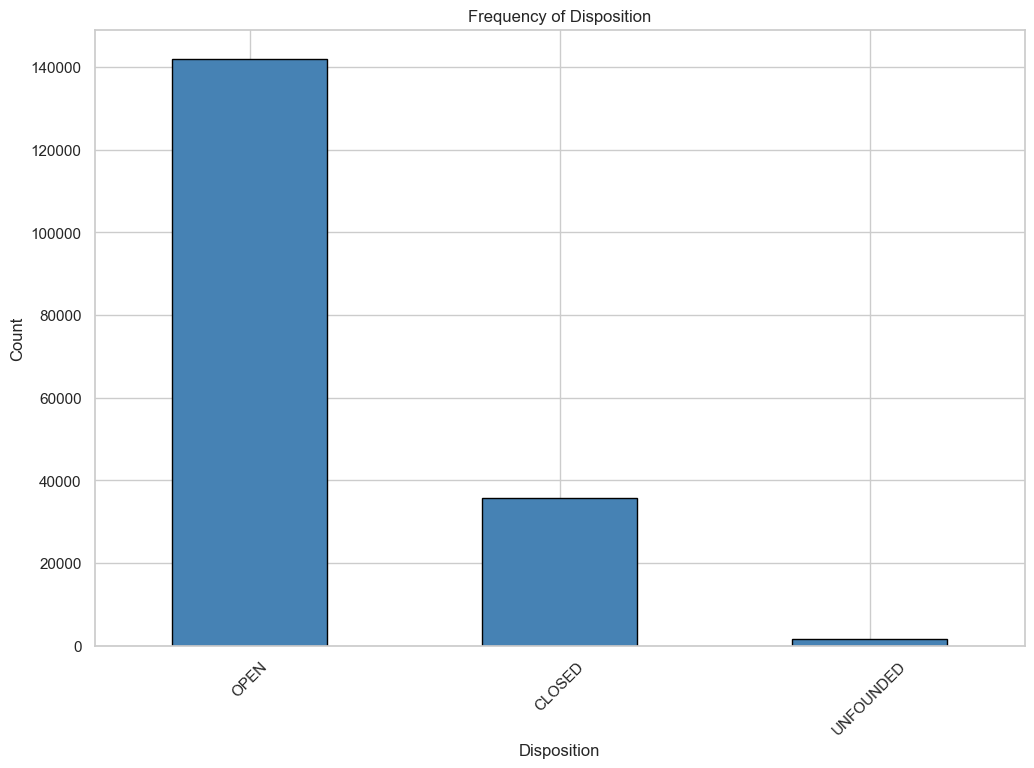

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='OffenderStatus'>

Text(0.5, 0, 'OffenderStatus')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of OffenderStatus')

(array([0]), [Text(0, 0, 'ARRESTED')])

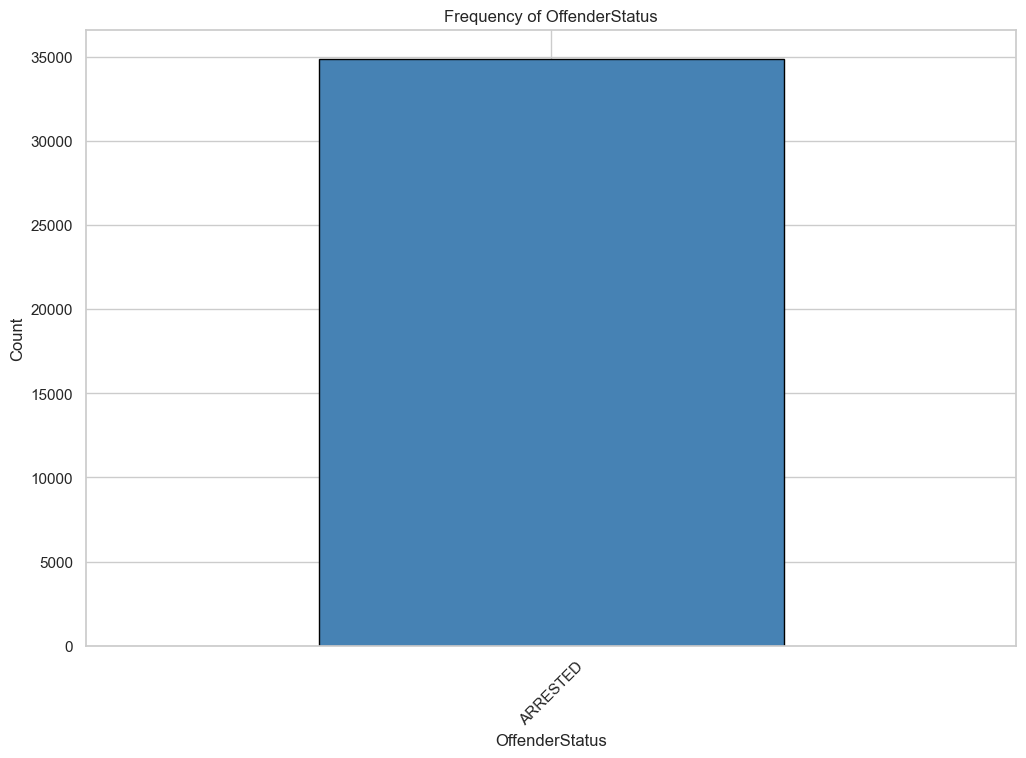

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Offender_Race'>

Text(0.5, 0, 'Offender_Race')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of Offender_Race')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BLACK'),
  Text(1, 0, 'UNKNOWN'),
  Text(2, 0, 'WHITE'),
  Text(3, 0, 'ASIAN'),
  Text(4, 0, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'),
  Text(5, 0, 'AMER. IND.')])

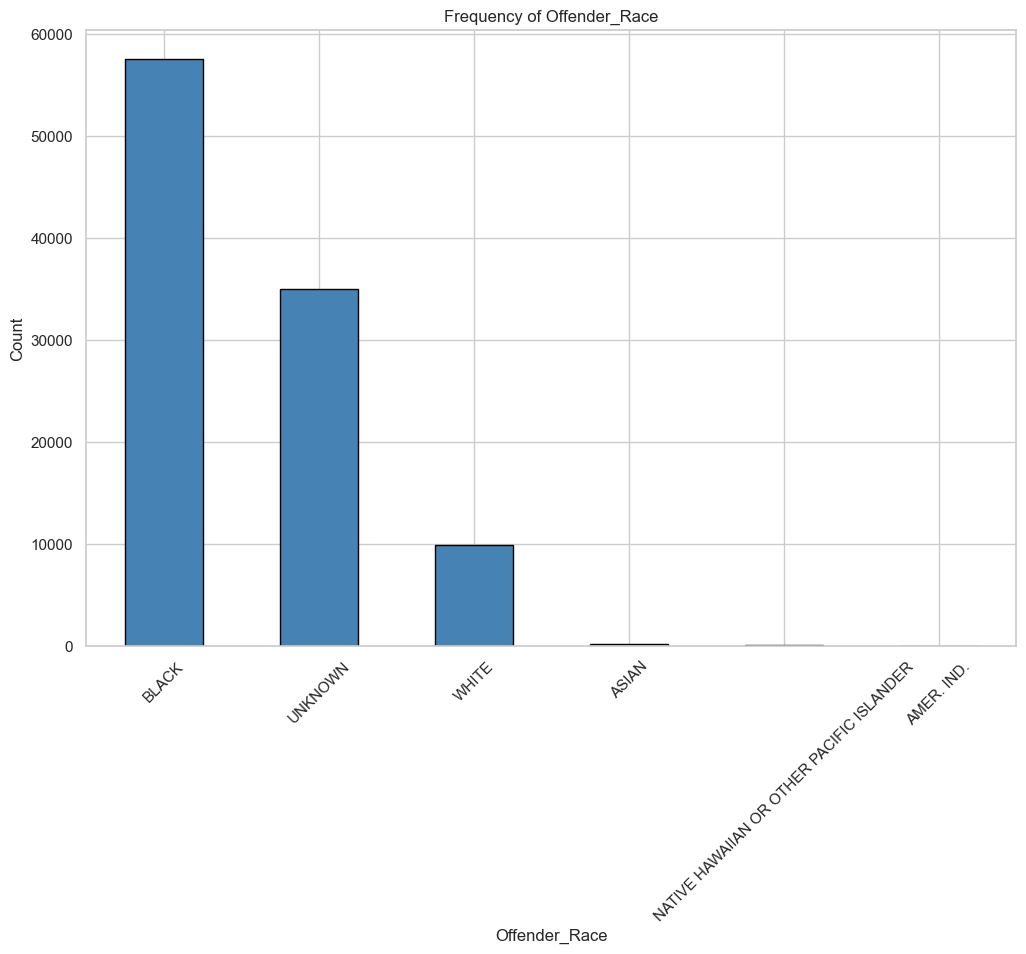

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Offender_Gender'>

Text(0.5, 0, 'Offender_Gender')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of Offender_Gender')

(array([0, 1, 2]),
 [Text(0, 0, 'MALE'), Text(1, 0, 'UNKNOWN'), Text(2, 0, 'FEMALE')])

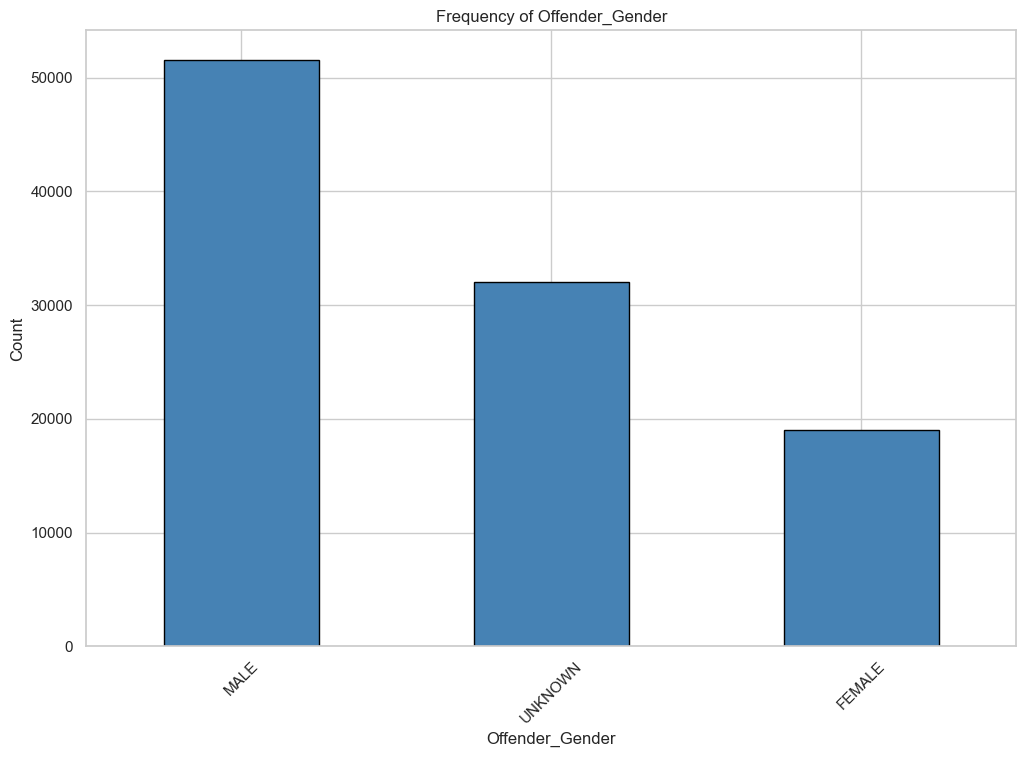

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='PersonType'>

Text(0.5, 0, 'PersonType')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of PersonType')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'VICTIM'),
  Text(1, 0, 'REPORTING PERSON'),
  Text(2, 0, 'INTERVIEW'),
  Text(3, 0, 'NON-VICTIM'),
  Text(4, 0, 'WITNESS'),
  Text(5, 0, 'MISSING PERSON'),
  Text(6, 0, 'RUNAWAY JUVENILE'),
  Text(7, 0, 'MISSING JUVENILE')])

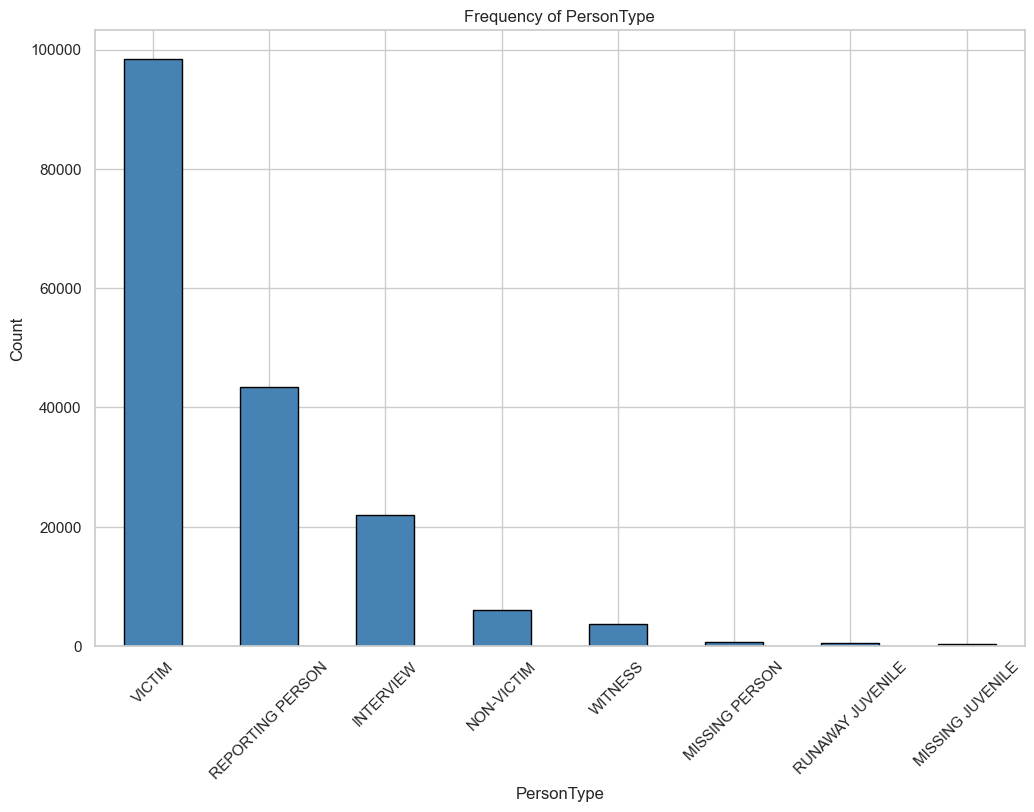

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Victim_Race'>

Text(0.5, 0, 'Victim_Race')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of Victim_Race')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BLACK'),
  Text(1, 0, 'WHITE'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'ASIAN'),
  Text(4, 0, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'),
  Text(5, 0, 'AMER. IND.')])

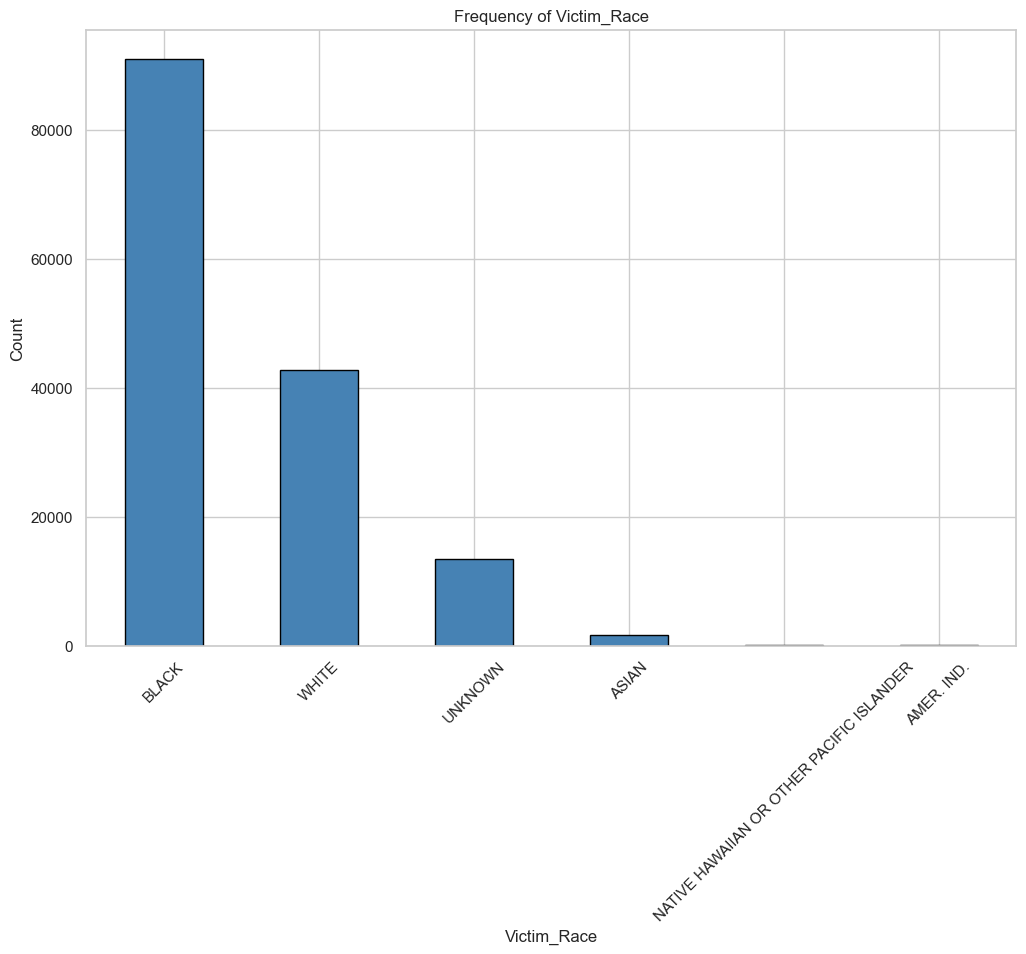

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Victim_Gender'>

Text(0.5, 0, 'Victim_Gender')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of Victim_Gender')

(array([0, 1, 2]),
 [Text(0, 0, 'FEMALE'), Text(1, 0, 'MALE'), Text(2, 0, 'UNKNOWN')])

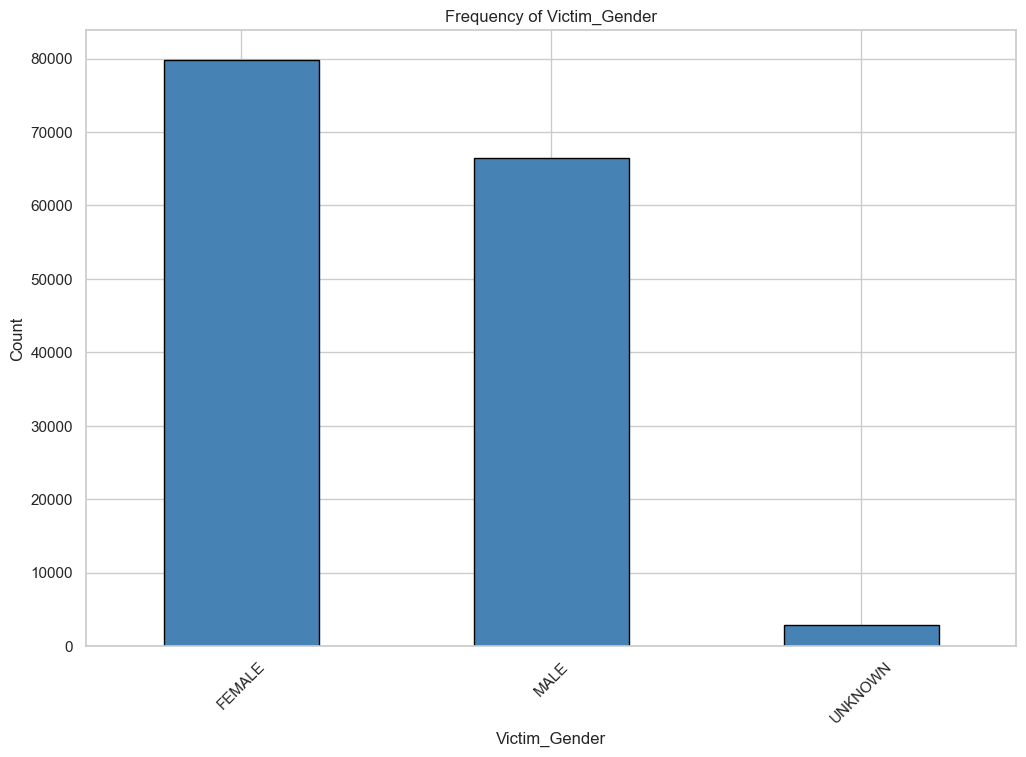

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Victim_Fatal_Status'>

Text(0.5, 0, 'Victim_Fatal_Status')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Frequency of Victim_Fatal_Status')

(array([0, 1]), [Text(0, 0, 'Non-fatal'), Text(1, 0, 'Fatal')])

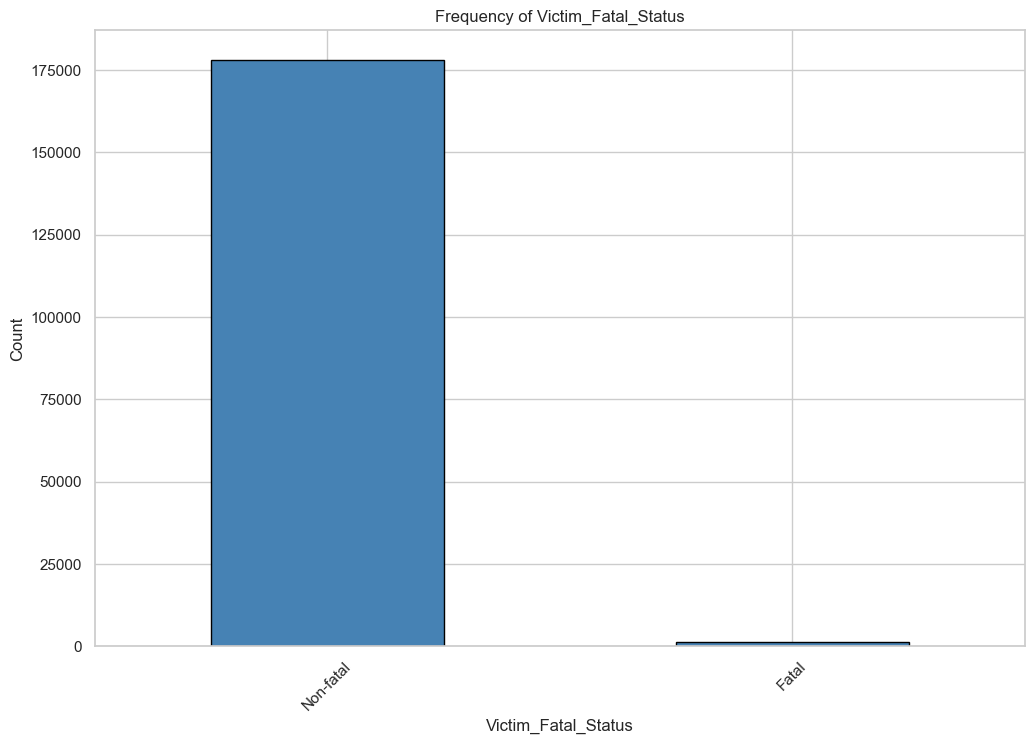

In [9]:
# Loop through each categorical column and create a bar chart
for col in categorical_columns:
    plt.figure(figsize=(12, 8))  # Adjust figure size for each plot
    df[col].value_counts().plot(kind="bar", color="steelblue", edgecolor="black")
    
    # Add labels
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.show()  # Show each plot separately

In [10]:
# Define age bins and labels
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Adjust as needed
age_labels = ["0-18", "19-30", "31-40", "41-50", "51-60", "61-70", "71+"]

# Bin the Offender_Age
df["Offender_Age_Binned"] = pd.cut(df["Offender_Age"], bins=age_bins, labels=age_labels, right=False)

# Bin the Victim_Age
df["Victim_Age_Binned"] = pd.cut(df["Victim_Age"], bins=age_bins, labels=age_labels, right=False)

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Offender_Age_Binned'>

Text(0.5, 0, 'Offender Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Offender Ages')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-30'),
  Text(2, 0, '31-40'),
  Text(3, 0, '41-50'),
  Text(4, 0, '51-60'),
  Text(5, 0, '61-70'),
  Text(6, 0, '71+')])

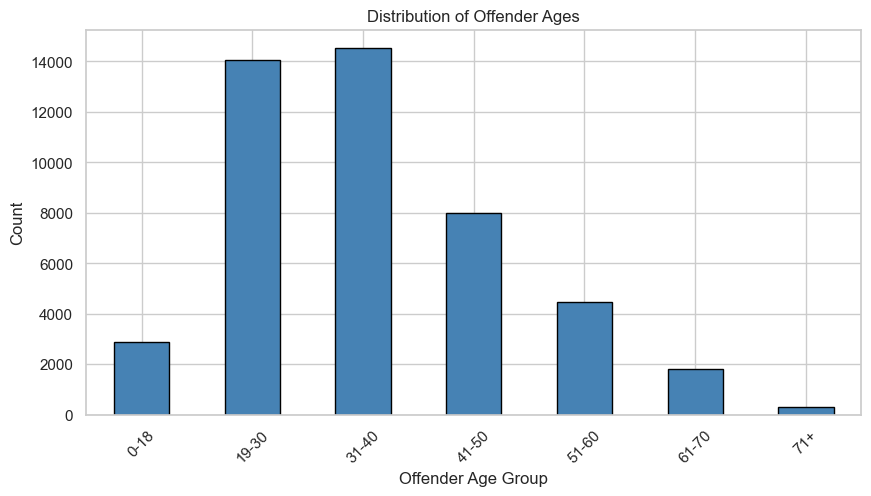

In [11]:
plt.figure(figsize=(10, 5))
df["Offender_Age_Binned"].value_counts().sort_index().plot(kind="bar", color="steelblue", edgecolor="black")

plt.xlabel("Offender Age Group")
plt.ylabel("Count")
plt.title("Distribution of Offender Ages")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Victim_Age_Binned'>

Text(0.5, 0, 'Victim Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Victim Ages')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-30'),
  Text(2, 0, '31-40'),
  Text(3, 0, '41-50'),
  Text(4, 0, '51-60'),
  Text(5, 0, '61-70'),
  Text(6, 0, '71+')])

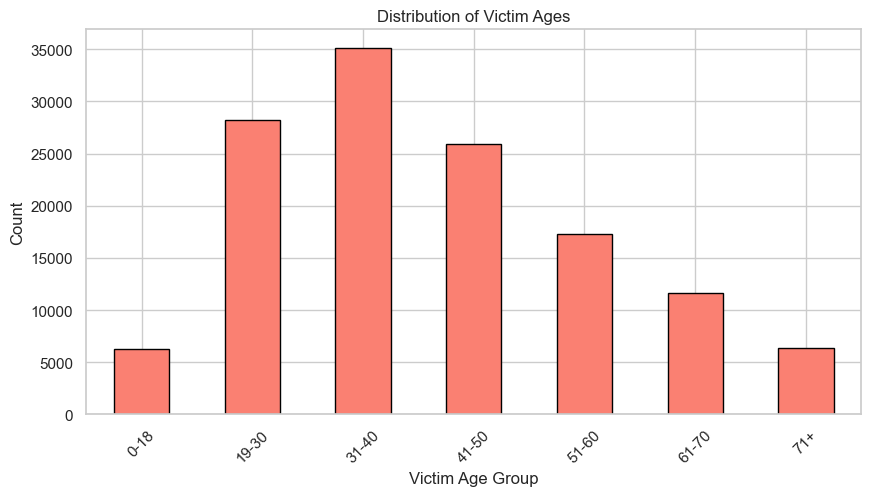

In [12]:
plt.figure(figsize=(10, 5))
df["Victim_Age_Binned"].value_counts().sort_index().plot(kind="bar", color="salmon", edgecolor="black")

plt.xlabel("Victim Age Group")
plt.ylabel("Count")
plt.title("Distribution of Victim Ages")
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

([<matplotlib.axis.XTick at 0x25c85bd1400>,
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-30'),
  Text(2, 0, '31-40'),
  Text(3, 0, '41-50'),
  Text(4, 0, '51-60'),
  Text(5, 0, '61-70'),
  Text(6, 0, '71+')])

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Comparison of Offender and Victim Age Distributions')

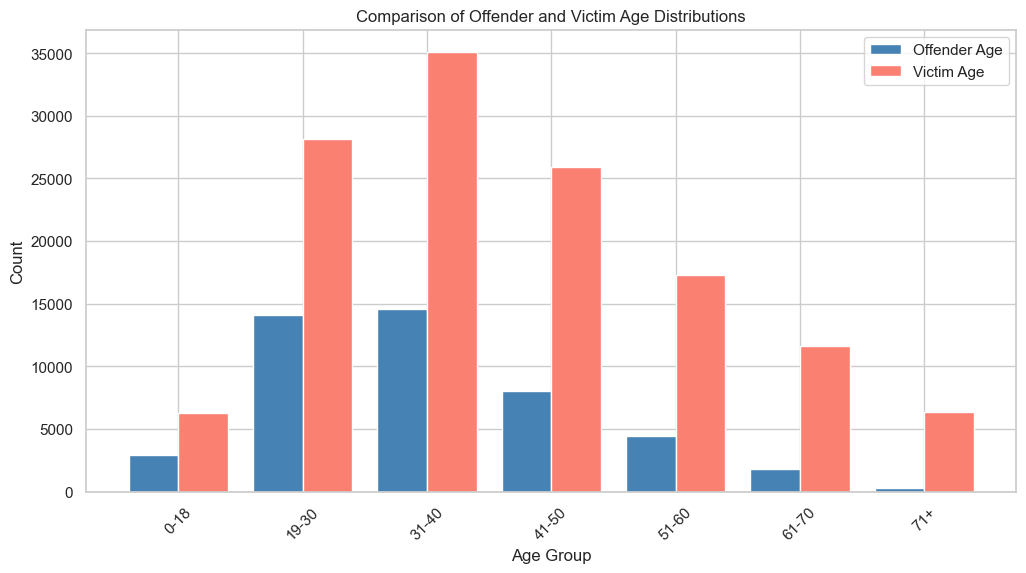

In [13]:
plt.figure(figsize=(12, 6))

# Count the bins for both offender and victim ages
offender_counts = df["Offender_Age_Binned"].value_counts().sort_index()
victim_counts = df["Victim_Age_Binned"].value_counts().sort_index()

# Create a grouped bar chart
import numpy as np

x = np.arange(len(age_labels))  # X-axis positions
width = 0.4  # Bar width

plt.bar(x - width/2, offender_counts, width=width, label="Offender Age", color="steelblue")
plt.bar(x + width/2, victim_counts, width=width, label="Victim Age", color="salmon")

# Add labels
plt.xticks(ticks=x, labels=age_labels, rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Comparison of Offender and Victim Age Distributions")
plt.legend()

plt.show()


In [14]:
df.columns

Index(['Item_Number', 'District', 'Location', 'Disposition', 'Signal_Type',
       'Signal_Description', 'Occurred_Date_Time', 'Charge_Code',
       'Charge_Description', 'Offender_Number', 'OffenderID', 'OffenderStatus',
       'Offender_Race', 'Offender_Gender', 'Offender_Age', 'Victim_Number',
       'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Age',
       'Victim_Fatal_Status', 'Hate Crime', 'Report Type',
       'Offender_Age_Binned', 'Victim_Age_Binned'],
      dtype='object')

In [15]:
# Get descriptive statistics for numerical columns
numeric_columns = ["Offender_Age", "Victim_Age"]
print(df[numeric_columns].describe())

       Offender_Age     Victim_Age
count  46030.000000  130728.000000
mean      34.787443      40.418740
std       12.743430      15.943391
min        0.000000       0.000000
25%       25.000000      29.000000
50%       33.000000      38.000000
75%       42.000000      51.000000
max       86.000000     124.000000


<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Offender Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Offender Ages')

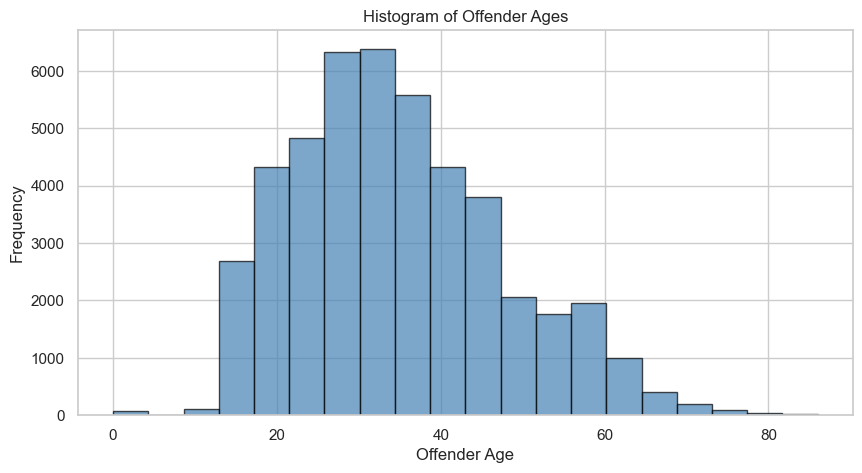

In [16]:
plt.figure(figsize=(10, 5))
df["Offender_Age"].plot(kind="hist", bins=20, color="steelblue", edgecolor="black", alpha=0.7)

plt.xlabel("Offender Age")
plt.ylabel("Frequency")
plt.title("Histogram of Offender Ages")
plt.show()


<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Victim Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Victim Ages')

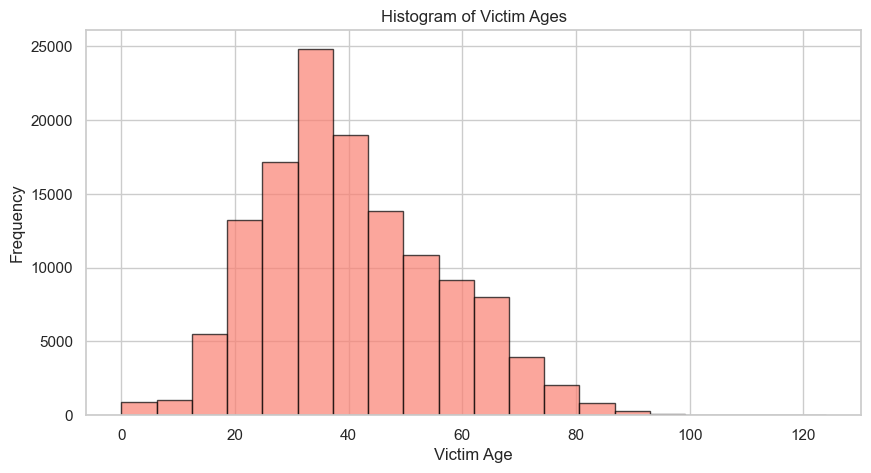

In [17]:
plt.figure(figsize=(10, 5))
df["Victim_Age"].plot(kind="hist", bins=20, color="salmon", edgecolor="black", alpha=0.7)

plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Ages")
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Offender_Age'>

Text(0.5, 0, 'Offender Age')

Text(0.5, 1.0, 'Box Plot of Offender Ages')

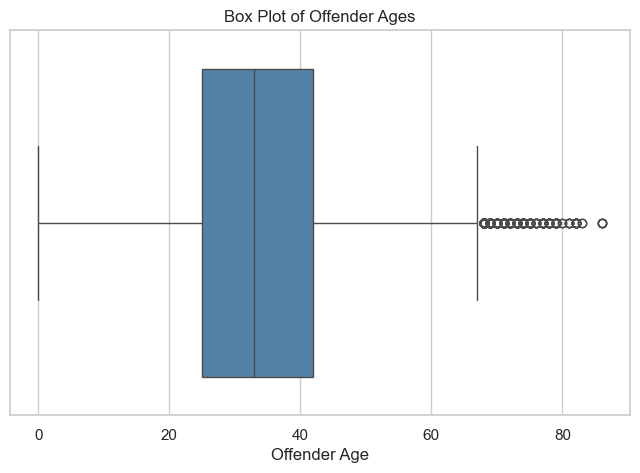

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Offender_Age"], color="steelblue")

plt.xlabel("Offender Age")
plt.title("Box Plot of Offender Ages")
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Victim_Age'>

Text(0.5, 0, 'Victim Age')

Text(0.5, 1.0, 'Box Plot of Victim Ages')

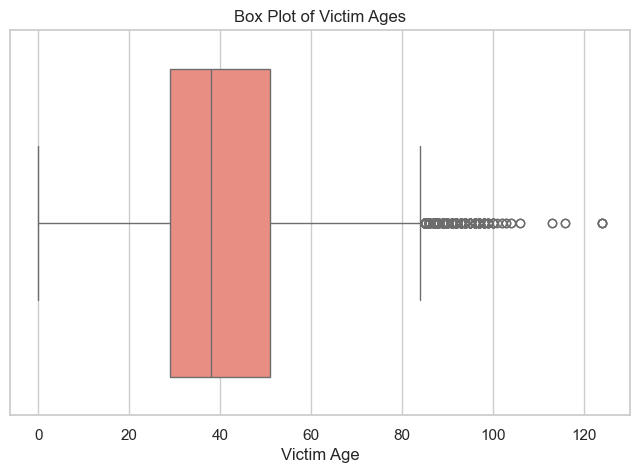

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Victim_Age"], color="salmon")

plt.xlabel("Victim Age")
plt.title("Box Plot of Victim Ages")
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Offender_Age', ylabel='Density'>

<Axes: xlabel='Offender_Age', ylabel='Density'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Density Plot of Offender and Victim Ages')

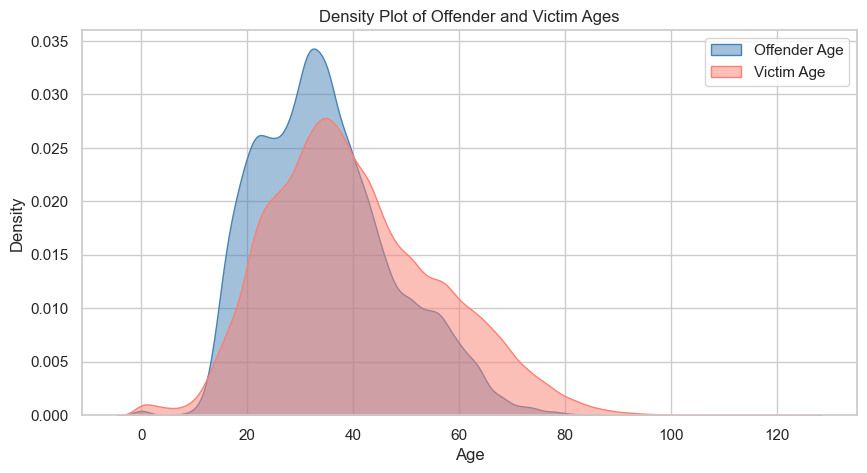

In [20]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Offender_Age"], fill=True, color="steelblue", alpha=0.5, label="Offender Age")
sns.kdeplot(df["Victim_Age"], fill=True, color="salmon", alpha=0.5, label="Victim Age")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of Offender and Victim Ages")
plt.legend()
plt.show()

In [21]:
# Convert the column to datetime format
df["Occurred_Date_Time"] = pd.to_datetime(df["Occurred_Date_Time"])

In [22]:
df["Year"] = df["Occurred_Date_Time"].dt.year
df["Month"] = df["Occurred_Date_Time"].dt.month
df["Day"] = df["Occurred_Date_Time"].dt.day
df["Hour"] = df["Occurred_Date_Time"].dt.hour
df["Weekday"] = df["Occurred_Date_Time"].dt.day_name()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Occurred_Date_Time'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 1.0, 'Crime Trends Over Time')

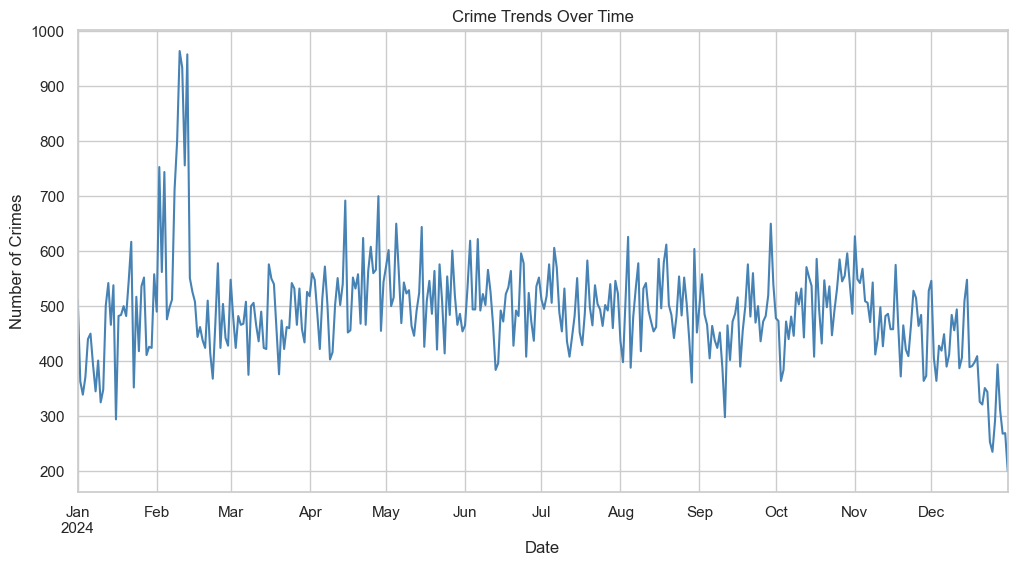

In [23]:
# Aggregate crime counts per day
crime_per_day = df.resample("D", on="Occurred_Date_Time").size()

# Plot time series
plt.figure(figsize=(12, 6))
crime_per_day.plot(color="steelblue")

plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.title("Crime Trends Over Time")
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Hour', ylabel='Weekday'>

Text(0.5, 33.249999999999986, 'Hour of the Day')

Text(117.24999999999999, 0.5, 'Day of the Week')

Text(0.5, 1.0, 'Crime Frequency by Hour and Day')

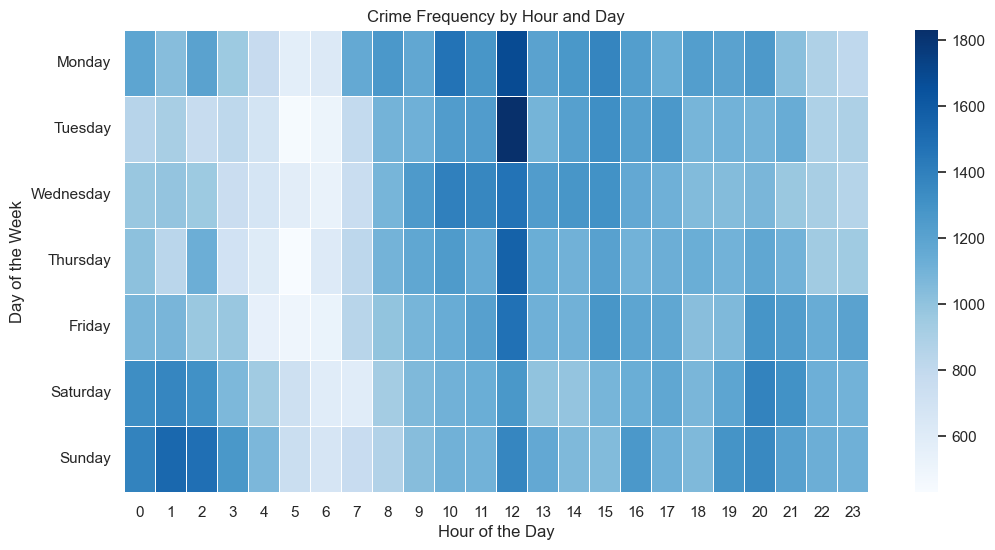

In [24]:
# Create pivot table (Days as rows, Hours as columns)
crime_heatmap = df.pivot_table(index="Weekday", columns="Hour", values="Item_Number", aggfunc="count")

# Reorder days of the week
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_heatmap = crime_heatmap.reindex(week_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_heatmap, cmap="Blues", linewidths=0.5)

plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Crime Frequency by Hour and Day")
plt.show()


<Axes: xlabel='Occurred_Date_Time'>

Text(0, 0.5, 'Observed')

<Axes: xlabel='Occurred_Date_Time'>

Text(0, 0.5, 'Trend')

<Axes: xlabel='Occurred_Date_Time'>

Text(0, 0.5, 'Seasonality')

<Axes: xlabel='Occurred_Date_Time'>

Text(0, 0.5, 'Residuals')

[None, None, None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Seasonal Decomposition of Crime Trends')

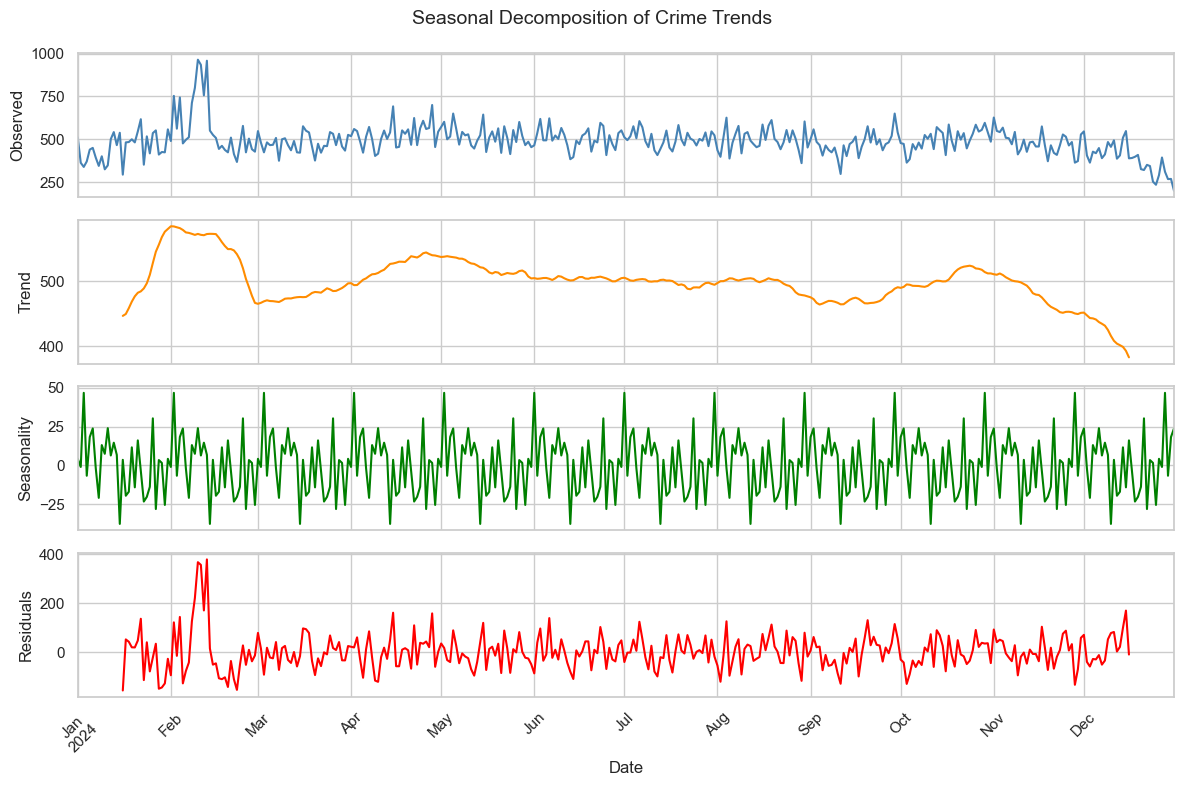

In [26]:
# Aggregate daily crime counts
crime_per_day = df.resample("D", on="Occurred_Date_Time").size()

# Apply seasonal decomposition
decomposition = seasonal_decompose(crime_per_day, model="additive", period=30)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Plot each component separately
decomposition.observed.plot(ax=axes[0], legend=False, color="steelblue")
axes[0].set_ylabel("Observed")

decomposition.trend.plot(ax=axes[1], legend=False, color="darkorange")
axes[1].set_ylabel("Trend")

decomposition.seasonal.plot(ax=axes[2], legend=False, color="green")
axes[2].set_ylabel("Seasonality")

decomposition.resid.plot(ax=axes[3], legend=False, color="red")
axes[3].set_ylabel("Residuals")

# Rotate x-axis labels for better readability
for ax in axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.xlabel("Date")
plt.suptitle("Seasonal Decomposition of Crime Trends", fontsize=14)
plt.tight_layout()
plt.show()


In [27]:
# Cross-tab between Offender_Race and Disposition
cross_tab = pd.crosstab(df["Offender_Race"], df["Disposition"])
print(cross_tab)

Disposition                                CLOSED   OPEN  UNFOUNDED
Offender_Race                                                      
AMER. IND.                                     14      4          0
ASIAN                                          78    100          0
BLACK                                       27623  29879         65
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      14     30          0
UNKNOWN                                       504  34386         91
WHITE                                        5354   4485         18


In [28]:
# Cross-tab between Offender_Race and Disposition
cross_tab = pd.crosstab(df["Victim_Race"], df["Disposition"])
print(cross_tab)

Disposition                                CLOSED   OPEN  UNFOUNDED
Victim_Race                                                        
AMER. IND.                                     20     80          2
ASIAN                                         192   1436         16
BLACK                                       13686  76742        555
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      12    164          4
UNKNOWN                                      1233  12190        107
WHITE                                        6169  36221        333


<Axes: xlabel='Victim_Race'>

Text(0.5, 0, 'Offender Race')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Offender Race vs. Disposition')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'AMER. IND.'),
  Text(1, 0, 'ASIAN'),
  Text(2, 0, 'BLACK'),
  Text(3, 0, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'WHITE')])

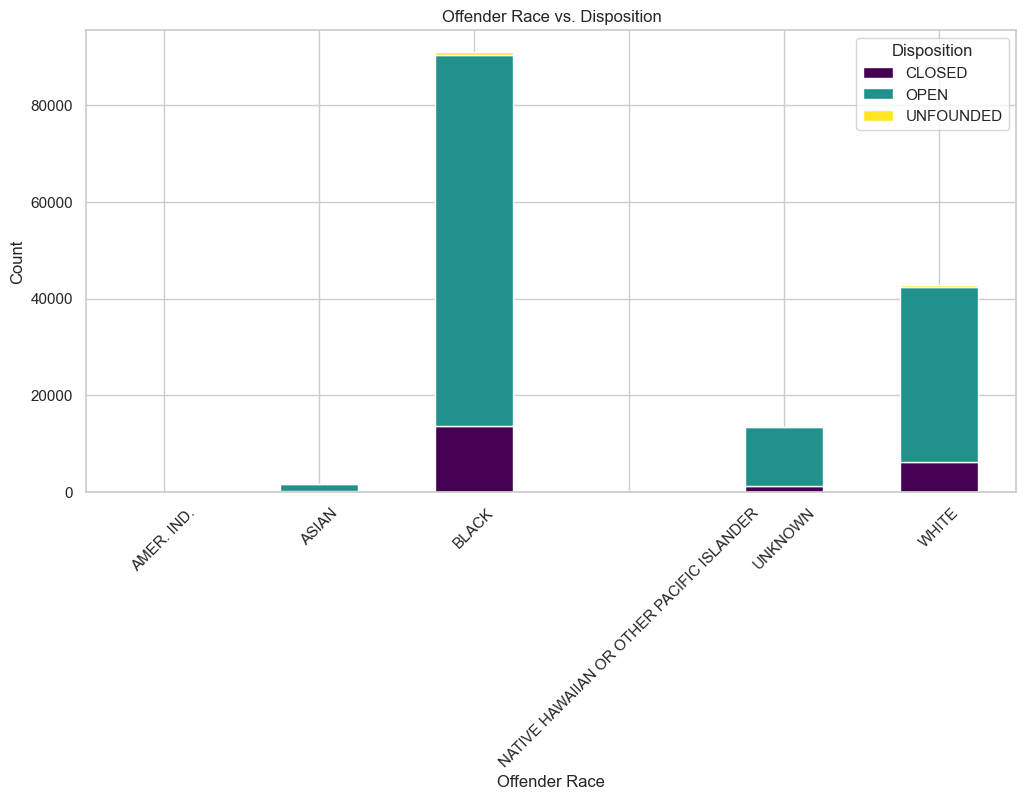

In [29]:
cross_tab.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Offender Race")
plt.ylabel("Count")
plt.title("Offender Race vs. Disposition")
plt.xticks(rotation=45)
plt.legend(title="Disposition")
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Offender_Age', ylabel='Victim_Age'>

Text(0.5, 0, 'Offender Age')

Text(0, 0.5, 'Victim Age')

Text(0.5, 1.0, 'Offender Age vs. Victim Age')

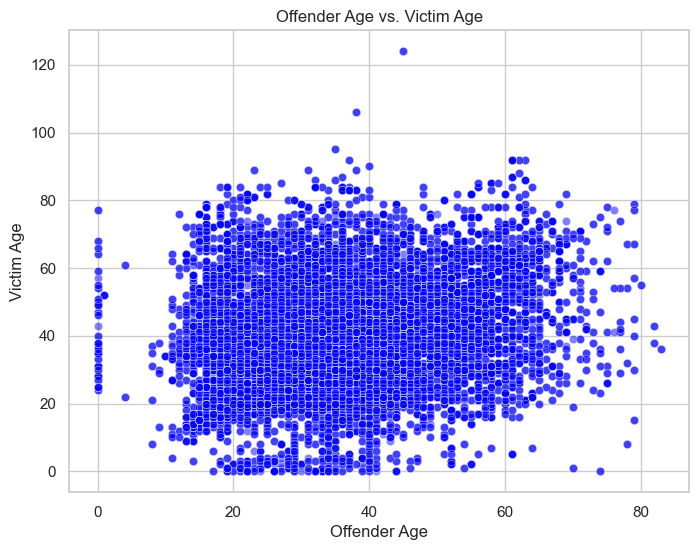

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Offender_Age"], y=df["Victim_Age"], alpha=0.5, color="blue")

plt.xlabel("Offender Age")
plt.ylabel("Victim Age")
plt.title("Offender Age vs. Victim Age")
plt.show()

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

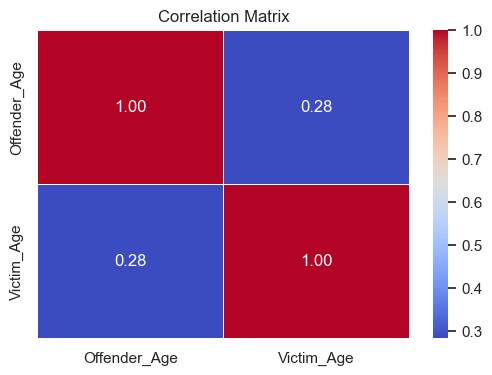

In [31]:
import numpy as np

# Compute correlation matrix for numeric columns
correlation_matrix = df[["Offender_Age", "Victim_Age"]].corr()

# Display heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x500 with 0 Axes>

C:\Users\Dd\AppData\Local\Temp\ipykernel_18032\1798173879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Disposition"], y=df["Offender_Age"], palette="coolwarm")


<Axes: xlabel='Disposition', ylabel='Offender_Age'>

Text(0.5, 0, 'Disposition')

Text(0, 0.5, 'Offender Age')

Text(0.5, 1.0, 'Offender Age Distribution by Disposition')

([0, 1, 2],
 [Text(0, 0, 'OPEN'), Text(1, 0, 'CLOSED'), Text(2, 0, 'UNFOUNDED')])

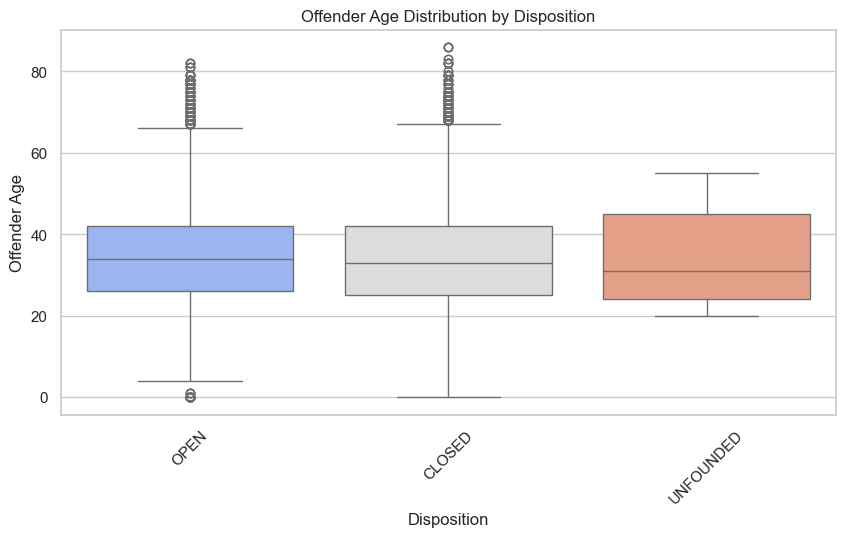

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Disposition"], y=df["Offender_Age"], palette="coolwarm")

plt.xlabel("Disposition")
plt.ylabel("Offender Age")
plt.title("Offender Age Distribution by Disposition")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

C:\Users\Dd\AppData\Local\Temp\ipykernel_18032\1594568066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Disposition"], y=df["Victim_Age"], palette="viridis")


<Axes: xlabel='Disposition', ylabel='Victim_Age'>

Text(0.5, 0, 'Disposition')

Text(0, 0.5, 'Victim Age')

Text(0.5, 1.0, 'Victim Age Distribution by Disposition')

([0, 1, 2],
 [Text(0, 0, 'OPEN'), Text(1, 0, 'CLOSED'), Text(2, 0, 'UNFOUNDED')])

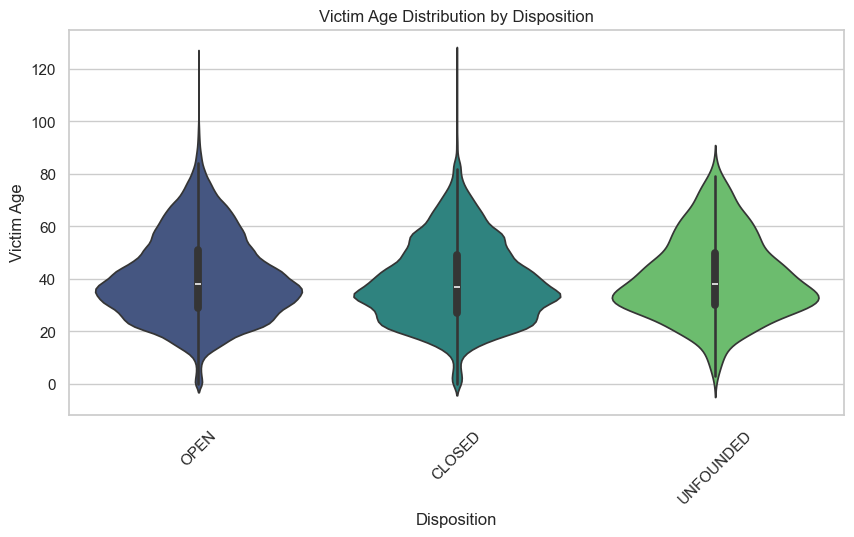

In [33]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Disposition"], y=df["Victim_Age"], palette="viridis")

plt.xlabel("Disposition")
plt.ylabel("Victim Age")
plt.title("Victim Age Distribution by Disposition")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

C:\Users\Dd\AppData\Local\Temp\ipykernel_18032\1108466637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Disposition"], y=df["Offender_Age"], palette="viridis")


<Axes: xlabel='Disposition', ylabel='Offender_Age'>

Text(0.5, 0, 'Disposition')

Text(0, 0.5, 'Offender Age')

Text(0.5, 1.0, 'Offender Age Distribution by Disposition')

([0, 1, 2],
 [Text(0, 0, 'OPEN'), Text(1, 0, 'CLOSED'), Text(2, 0, 'UNFOUNDED')])

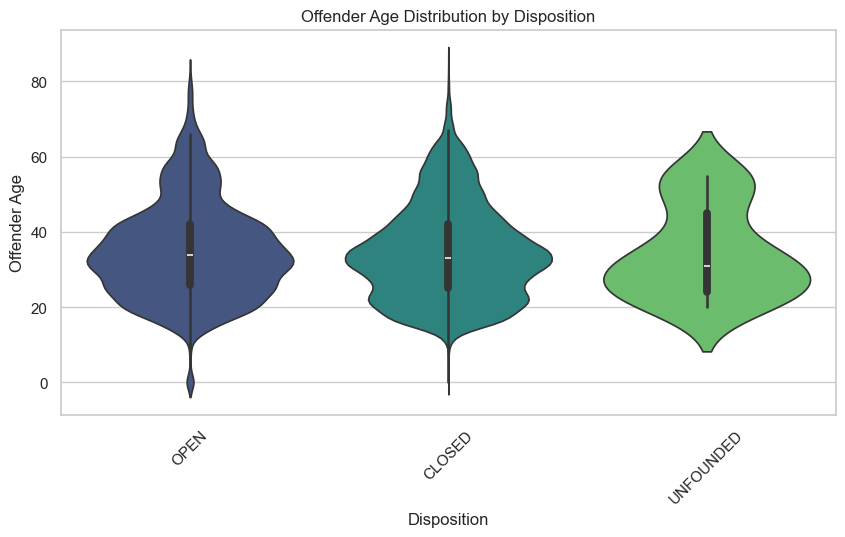

In [34]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Disposition"], y=df["Offender_Age"], palette="viridis")

plt.xlabel("Disposition")
plt.ylabel("Offender Age")
plt.title("Offender Age Distribution by Disposition")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month_Year'>

Text(0.5, 0, 'Month-Year')

Text(0, 0.5, 'Crime Count')

Text(0.5, 1.0, 'Crime Trends Over Time')

(array([648]), [Text(648, 0, 'Jan\n2024')])

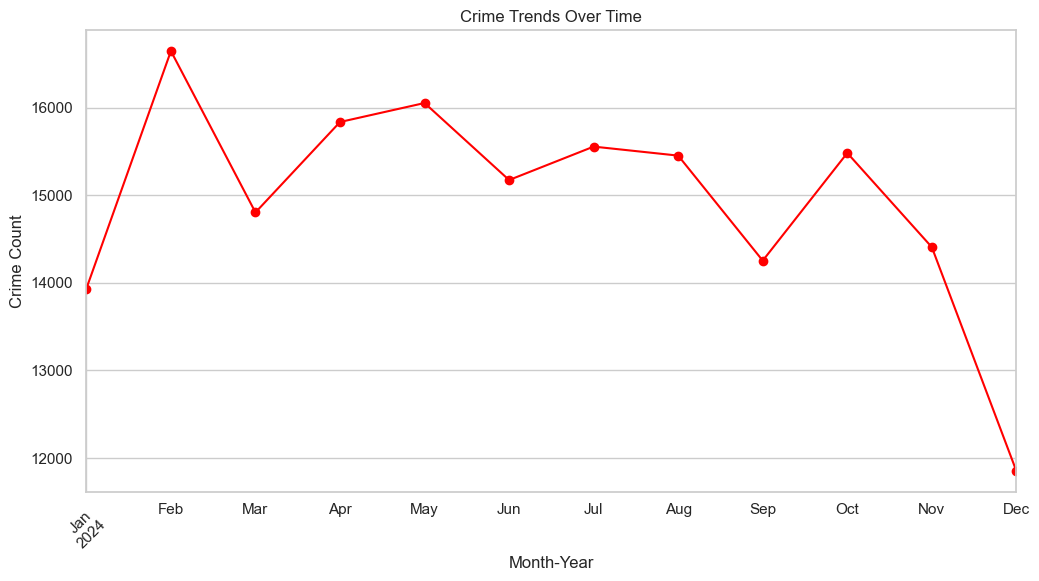

In [35]:
df["Month_Year"] = df["Occurred_Date_Time"].dt.to_period("M")

crime_per_month = df.groupby("Month_Year").size()

plt.figure(figsize=(12, 6))
crime_per_month.plot(kind="line", marker="o", color="red")

plt.xlabel("Month-Year")
plt.ylabel("Crime Count")
plt.title("Crime Trends Over Time")
plt.xticks(rotation=45)
plt.show()

In [39]:
# Store results
chi_square_results = []

# Loop through all combinations of categorical variables
for col1, col2 in combinations(categorical_columns, 2):
    # Create contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform Chi-Square Test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Store results
    chi_square_results.append({
        "Variable 1": col1,
        "Variable 2": col2,
        "Chi-Square Statistic": chi2,
        "P-Value": p
    })

# Convert results to DataFrame
chi_square_df = pd.DataFrame(chi_square_results)
chi_square_df

,Variable 1,Variable 2,Chi-Square Statistic,P-Value
0,District,Disposition,1512.246656,0.000000e+00
1,District,OffenderStatus,0.000000,1.000000e+00
2,District,Offender_Race,2260.161901,0.000000e+00
3,District,Offender_Gender,636.621462,8.460950e-127
4,District,PersonType,4245.918200,0.000000e+00
5,District,Victim_Race,20131.346655,0.000000e+00
6,District,Victim_Gender,3351.832543,0.000000e+00
7,District,Victim_Fatal_Status,115.384109,6.994694e-22
8,Disposition,OffenderStatus,0.000000,1.000000e+00
9,Disposition,Offender_Race,23758.528955,0.000000e+00


In [41]:
# Add a "SIGNIFICANT" column based on the P-Value threshold
chi_square_df["SIGNIFICANT"] = chi_square_df["P-Value"].apply(lambda p: "SIGNIFICANT" if p < 0.05 else "not significant")
chi_square_df

,Variable 1,Variable 2,Chi-Square Statistic,P-Value,SIGNIFICANT
0,District,Disposition,1512.246656,0.000000e+00,SIGNIFICANT
1,District,OffenderStatus,0.000000,1.000000e+00,not significant
2,District,Offender_Race,2260.161901,0.000000e+00,SIGNIFICANT
3,District,Offender_Gender,636.621462,8.460950e-127,SIGNIFICANT
4,District,PersonType,4245.918200,0.000000e+00,SIGNIFICANT
5,District,Victim_Race,20131.346655,0.000000e+00,SIGNIFICANT
6,District,Victim_Gender,3351.832543,0.000000e+00,SIGNIFICANT
7,District,Victim_Fatal_Status,115.384109,6.994694e-22,SIGNIFICANT
8,Disposition,OffenderStatus,0.000000,1.000000e+00,not significant
9,Disposition,Offender_Race,23758.528955,0.000000e+00,SIGNIFICANT


In [42]:
# Separate significant and not significant results into two DataFrames
significant_df = chi_square_df[chi_square_df["SIGNIFICANT"] == "SIGNIFICANT"].reset_index(drop=True)
not_significant_df = chi_square_df[chi_square_df["SIGNIFICANT"] == "not significant"].reset_index(drop=True)

# Display results
significant_df
not_significant_df

,Variable 1,Variable 2,Chi-Square Statistic,P-Value,SIGNIFICANT
0,District,Disposition,1512.246656,0.000000e+00,SIGNIFICANT
1,District,Offender_Race,2260.161901,0.000000e+00,SIGNIFICANT
2,District,Offender_Gender,636.621462,8.460950e-127,SIGNIFICANT
3,District,PersonType,4245.918200,0.000000e+00,SIGNIFICANT
4,District,Victim_Race,20131.346655,0.000000e+00,SIGNIFICANT
5,District,Victim_Gender,3351.832543,0.000000e+00,SIGNIFICANT
6,District,Victim_Fatal_Status,115.384109,6.994694e-22,SIGNIFICANT
7,Disposition,Offender_Race,23758.528955,0.000000e+00,SIGNIFICANT
8,Disposition,Offender_Gender,23043.641891,0.000000e+00,SIGNIFICANT
9,Disposition,PersonType,14594.669219,0.000000e+00,SIGNIFICANT


,Variable 1,Variable 2,Chi-Square Statistic,P-Value,SIGNIFICANT
0,District,OffenderStatus,0.000000,1.000000,not significant
1,Disposition,OffenderStatus,0.000000,1.000000,not significant
2,OffenderStatus,Offender_Race,0.000000,1.000000,not significant
3,OffenderStatus,Offender_Gender,0.000000,1.000000,not significant
4,OffenderStatus,PersonType,0.000000,1.000000,not significant
5,OffenderStatus,Victim_Race,0.000000,1.000000,not significant
6,OffenderStatus,Victim_Gender,0.000000,1.000000,not significant
7,OffenderStatus,Victim_Fatal_Status,0.000000,1.000000,not significant
8,Offender_Race,Victim_Fatal_Status,9.154591,0.103055,not significant
